In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikit-multilearn==0.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.4 MB/s eta 0:00:00


In [3]:
import tensorflow as tf

tf.config.set_visible_devices([], 'GPU')

In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.adapt import MLkNN
import sklearn.metrics as metrics
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
import os

In [5]:
os.chdir('/content/drive/MyDrive/NLP_Project/NLP/training')
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/MyDrive/NLP_Project/NLP/training': ['train_en_l1.csv', 'train_en_l2.csv', 'train_en_l3.csv', 'train_hi_l1.csv', 'train_hi_l2.csv', 'train_hi_l3.csv', 'train_ta_l1.csv', 'train_ta_l2.csv', 'train_ta_l3.csv']


In [6]:
d2 = pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_hi_l1.csv')


for col in ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']:
    d2[col] = pd.to_numeric(d2[col], errors='coerce')

d2['label'] = d2[['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values

d2 = d2.drop(['key', 'hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5'], axis=1)
d2['label'] = d2['label'].astype(int)
d2 = d2[['label', 'text']]
d2

,label,text
0,0,भारत में तीन किसान कानून बिल वापस लेने पर भक...
1,0,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...
2,0,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...
3,0,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...
4,1,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द..."
...,...,...
6192,0,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ..."
6193,0,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...
6194,0,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...
6195,0,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ..."


The label column is created in the original training dataset by taking the majority occurence of 0 or 1 among all the 5 annotators in columns - 'hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5'.

In [7]:
d3 = pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_hi_l1.csv')

for col in ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']:
    d3[col] = pd.to_numeric(d3[col], errors='coerce')

d3['label'] = d3[['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values

d3 = d3.drop(['key', 'hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5'], axis=1)
d3['label'] = d3['label'].astype(int)
d3 = d3[['label', 'text']]
d3

,label,text
0,0,भारत में तीन किसान कानून बिल वापस लेने पर भक...
1,0,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...
2,0,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...
3,0,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...
4,1,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द..."
...,...,...
6192,0,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ..."
6193,0,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...
6194,0,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...
6195,0,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ..."


In [8]:
d4 = pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_hi_l1.csv')

for col in ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']:
    d4[col] = pd.to_numeric(d4[col], errors='coerce')

d4['label'] = d4[['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values

d4 = d4.drop(['key', 'hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5'], axis=1)
d4['label'] = d4['label'].astype(int)
d4 = d4[['label', 'text']]
d4

,label,text
0,0,भारत में तीन किसान कानून बिल वापस लेने पर भक...
1,0,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...
2,0,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...
3,0,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...
4,1,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द..."
...,...,...
6192,0,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ..."
6193,0,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...
6194,0,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...
6195,0,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ..."


In [9]:
df1 = d2
df2=d3
df3=d4

## Word Pre-Processing

In [10]:
## Word Pre-Processing ##
import nltk
import string
import re

def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text


In [11]:
## Apply the written function ##
df1['text'] = df1['text'].apply(lambda x: normalize_text(x))
df2['text'] = df2['text'].apply(lambda x: normalize_text(x))
df3['text'] = df3['text'].apply(lambda x: normalize_text(x))

print(df1.head())
print(df2.head())
print(df3.head())

   label                                               text
0      0    भारत में तीन किसान कानून बिल वापस लेने पर भक...
1      0    राजस्थान  अजीबोगरीब  गांव की खुशहाली के लिए ...
2      0    सलमान ने की राखी के विरोधी की वकालत तो  आइटम...
3      0    हर शब्द अमॄतम    पुरानी एक कहावत है    टूटी ...
4      1   pm मोदी जी   की माँ के लिए अपशब्द कहने वाला द...
   label                                               text
0      0    भारत में तीन किसान कानून बिल वापस लेने पर भक...
1      0    राजस्थान  अजीबोगरीब  गांव की खुशहाली के लिए ...
2      0    सलमान ने की राखी के विरोधी की वकालत तो  आइटम...
3      0    हर शब्द अमॄतम    पुरानी एक कहावत है    टूटी ...
4      1   pm मोदी जी   की माँ के लिए अपशब्द कहने वाला द...
   label                                               text
0      0    भारत में तीन किसान कानून बिल वापस लेने पर भक...
1      0    राजस्थान  अजीबोगरीब  गांव की खुशहाली के लिए ...
2      0    सलमान ने की राखी के विरोधी की वकालत तो  आइटम...
3      0    हर शब्द अमॄतम    पुरानी एक क

# Train Test Splits

In [12]:
X1 = list(df1['text'])
y_data1 = df1['label']
y1 = y_data1.values

In [13]:
X2 = list(df2['text'])
y_data2 = df2['label']
y2 = y_data2.values

In [15]:
X3 = list(df3['text'])
y_data3 = df3['label']
y3 = y_data3.values

In [16]:
print(len(X1))
print(len(X2))
print(len(X3))

6197
6197
6197


In [17]:
print(y1.size)
print(y2.size)
print(y3.size)

6197
6197
6197


In [18]:
X1

['  भारत में तीन किसान कानून बिल वापस लेने पर भक्तों की जो हालत हुई अब यह किसी से छुपा नहीं है उसके इलावा जो टट्टी खोर पत्रकार थे उनकी भी हालत खराब हुई है किसी को मुंह दिखाने के लायक नहीं है अब यह लोग यहां तक कि अपने घर में भी मुंह दिखाने के लायक नहीं रहे।',
 '  राजस्थान  अजीबोगरीब  गांव की खुशहाली के लिए रात भर किन्नर करते है यह काम   ',
 '  सलमान ने की राखी के विरोधी की वकालत तो  आइटम गर्ल  ने दी धमकी   rakhisawant  salmankhan',
 '  हर शब्द अमॄतम    पुरानी एक कहावत है    टूटी की नही बनी है बूटी  झूठी की नहीं कोई भी खूॅंटी  फूटी को क्या करेगा सूठी  रूठी तो बने काली कलूटी   अर्थात  जिस व्यक्ति का आत्मविश्वास अंदर से टूट जाये उसको ठीक करने की कोई बूटी यानी ओषधि या दवा आज तक सन्सार में नहीं बनी है।  amrutam',
 ' pm मोदी जी   की माँ के लिए अपशब्द कहने वाला दोगला भड़वा राजबब्बर वास्तव में किसी रंडी की ही औलाद होगा  हरामी साला रंडी का दल्ला',
 ' pappu बस में खड़ा था   अचानक ब्रेक लगी तो एक लड़की पर गिर पडा                      लड़की    ने थप्पड़ मरते हुये कहाँ बत्तमीज़  क्या कर रहे हो      

In [20]:
y1


array([0, 0, 0, ..., 0, 0, 0])

In [21]:
!pip install keras

# Model CNN & Bi-LSTM

In [22]:
#Model CNN & Bi-LSTM
# import tenso
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
# from keras.layers.recurrent import LSTM
# from keras.layers.core import Activation, Dropout, Dense
from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Flatten, Bidirectional, GRU, concatenate, SpatialDropout1D

from keras.layers import Flatten, LSTM
from keras.layers import Bidirectional,GRU,concatenate,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D,Conv1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
import matplotlib.pyplot as plt
from keras import layers
from keras.optimizers import Adam,SGD,RMSprop
from keras.losses import MeanSquaredError
######## Textual Features for Embedding ###################
max_len = 100
max_features = 10000
max_features=20982
embed_size = 300




In [23]:
tokenizer1 = Tokenizer(num_words=max_features)
tokenizer1.fit_on_texts(list(X1))
word_index=tokenizer1.word_index
X1 = tokenizer1.texts_to_sequences(X1)
X1 = pad_sequences(X1, padding='post', maxlen=max_len)

In [24]:
tokenizer2 = Tokenizer(num_words=max_features)
tokenizer2.fit_on_texts(list(X2))
word_index=tokenizer2.word_index
X2 = tokenizer2.texts_to_sequences(X2)
X2 = pad_sequences(X2, padding='post', maxlen=max_len)

In [25]:
tokenizer3 = Tokenizer(num_words=max_features)
tokenizer3.fit_on_texts(list(X3))
word_index=tokenizer3.word_index
X3 = tokenizer3.texts_to_sequences(X3)
X3 = pad_sequences(X3, padding='post', maxlen=max_len)

In [27]:
y2

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
X2

array([[   63,     5,   896, ...,     0,     0,     0],
       [  629,  8331,  1047, ...,     0,     0,     0],
       [ 1783,    21,     3, ...,     0,     0,     0],
       ...,
       [20962,     5,   357, ...,     0,     0,     0],
       [ 7806,     6,   201, ...,     0,     0,     0],
       [  205,   205, 20971, ...,     0,     0,     0]], dtype=int32)

In [28]:
from keras.utils import to_categorical
y1 = to_categorical(y1, num_classes=2)
y1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [29]:
from keras.utils import to_categorical
y2 = to_categorical(y2, num_classes=2)
y2

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [30]:
from keras.utils import to_categorical
y3 = to_categorical(y3, num_classes=2)
y3

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [31]:
embedding_path = '/content/drive/MyDrive/NLP_Project/NLP/cc.hi.300.vec'


In [32]:
embedding_path = '/content/drive/MyDrive/NLP_Project/NLP/cc.hi.300.vec'

embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
with open(embedding_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().split()
        word = values[0]
        if word in word_index:
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_matrix[word_index[word]] = coefs

# Model Training

In [33]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D, GlobalAveragePooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

n_splits = 2
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

classification_reports = []
precision_list = []
recall_list = []
f1_score_list = []


for fold, (train_index, val_index) in enumerate(kf.split(X1, y1)):
    X_train, X_val = X1[train_index], X1[val_index]
    y_train, y_val = y1[train_index], y1[val_index]


    sequence_input = Input(shape=(max_len, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)

    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)

    x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    x = Dense(128,activation='relu')(avg_pool)
    x = Dropout(0.2)(x)
    preds = Dense(2, activation="softmax")(x)
    model = Model(sequence_input, preds)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    epochs = 5
    batch_size = 32
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)


    report = classification_report(y_val_labels, y_pred_labels, target_names=['Hate', 'Not Hate'], output_dict=True)

    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])

    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_val_labels, y_pred_labels, target_names=["Hate", "Not Hate"])}\n')

average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1_score = np.mean(f1_score_list)

average_report = f'Average Precision: {average_precision:.2f}\nAverage Recall: {average_recall:.2f}\nAverage F1-Score: {average_f1_score:.2f}'
print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')

Epoch 1/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 107s 980ms/step - accuracy: 0.6883 - loss: 0.6322 - val_accuracy: 0.7202 - val_loss: 0.5780
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 95s 989ms/step - accuracy: 0.7072 - loss: 0.5839 - val_accuracy: 0.7131 - val_loss: 0.5646
Epoch 3/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 118s 737ms/step - accuracy: 0.7195 - loss: 0.5594 - val_accuracy: 0.7364 - val_loss: 0.5502
Epoch 4/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 71s 623ms/step - accuracy: 0.7304 - loss: 0.5334 - val_accuracy: 0.7441 - val_loss: 0.5460
Epoch 5/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 61s 635ms/step - accuracy: 0.7521 - loss: 0.5184 - val_accuracy: 0.7490 - val_loss: 0.5335
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.77      0.93      0.84      2210
    Not Hate       0.63      0.30      0.41       889

    accuracy                           0.75      3099
   macro avg       0.70      0.61      0.62      3099
weighted avg

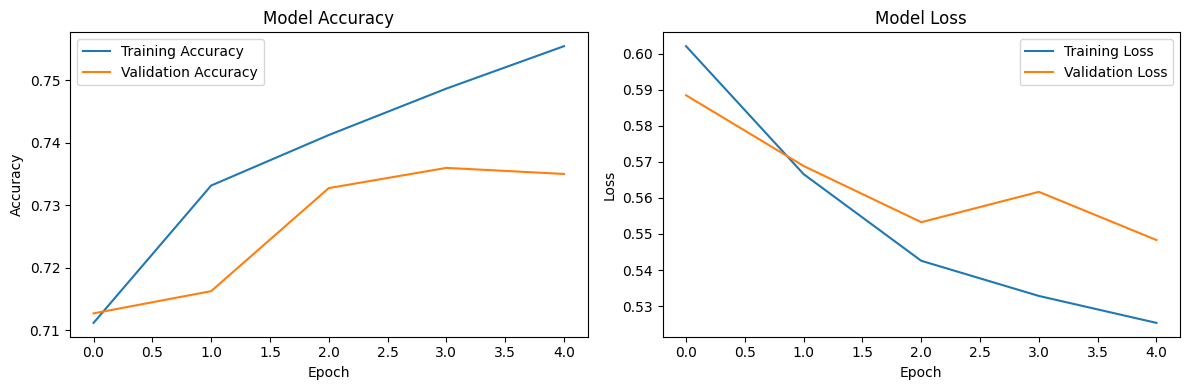

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D, GlobalAveragePooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

n_splits = 2
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

classification_reports = []
precision_list = []
recall_list = []
f1_score_list = []


for fold, (train_index, val_index) in enumerate(kf.split(X2, y2)):
    X_train, X_val = X2[train_index], X2[val_index]
    y_train, y_val = y2[train_index], y2[val_index]

    sequence_input = Input(shape=(max_len, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)

    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)

    x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    x = Dense(128,activation='relu')(avg_pool)
    x = Dropout(0.2)(x)
    preds = Dense(2, activation="softmax")(x)
    model1 = Model(sequence_input, preds)

    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    epochs = 5
    batch_size = 32
    history = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

    y_pred = model1.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)

    report = classification_report(y_val_labels, y_pred_labels, target_names=['Hate', 'Not Hate'], output_dict=True)

    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])

    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_val_labels, y_pred_labels, target_names=["Hate", "Not Hate"])}\n')

average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1_score = np.mean(f1_score_list)

average_report = f'Average Precision: {average_precision:.2f}\nAverage Recall: {average_recall:.2f}\nAverage F1-Score: {average_f1_score:.2f}'
print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')

Epoch 1/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 76s 635ms/step - accuracy: 0.7047 - loss: 0.6246 - val_accuracy: 0.7135 - val_loss: 0.5811
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 84s 656ms/step - accuracy: 0.7206 - loss: 0.5726 - val_accuracy: 0.7212 - val_loss: 0.5872
Epoch 3/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 60s 620ms/step - accuracy: 0.7268 - loss: 0.5483 - val_accuracy: 0.7373 - val_loss: 0.5423
Epoch 4/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 62s 639ms/step - accuracy: 0.7308 - loss: 0.5450 - val_accuracy: 0.7273 - val_loss: 0.5440
Epoch 5/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 636ms/step - accuracy: 0.7377 - loss: 0.5434 - val_accuracy: 0.7386 - val_loss: 0.5472
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.77      0.90      0.83      2210
    Not Hate       0.57      0.34      0.43       889

    accuracy                           0.74      3099
   macro avg       0.67      0.62      0.63      3099
weighted avg  

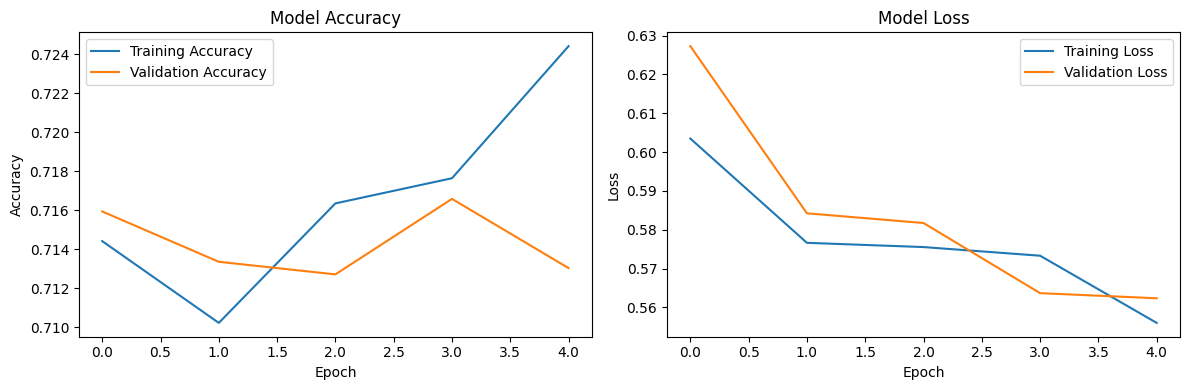

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D, GlobalAveragePooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

n_splits = 2
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

classification_reports = []
precision_list = []
recall_list = []
f1_score_list = []


for fold, (train_index, val_index) in enumerate(kf.split(X3, y3)):
    X_train, X_val = X3[train_index], X3[val_index]
    y_train, y_val = y3[train_index], y3[val_index]

    sequence_input = Input(shape=(max_len, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix],trainable = False)(sequence_input)

    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)

    x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    x = Dense(128,activation='relu')(avg_pool)
    x = Dropout(0.2)(x)
    preds = Dense(2, activation="softmax")(x)
    model2 = Model(sequence_input, preds)

    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    epochs = 5
    batch_size = 32
    history = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

    y_pred = model2.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)

    report = classification_report(y_val_labels, y_pred_labels, target_names=['Hate', 'Not Hate'], output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])

    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_val_labels, y_pred_labels, target_names=["Hate", "Not Hate"])}\n')

average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1_score = np.mean(f1_score_list)

average_report = f'Average Precision: {average_precision:.2f}\nAverage Recall: {average_recall:.2f}\nAverage F1-Score: {average_f1_score:.2f}'
print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')

Epoch 1/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 83s 739ms/step - accuracy: 0.7063 - loss: 0.6239 - val_accuracy: 0.7144 - val_loss: 0.5709
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 71s 626ms/step - accuracy: 0.7077 - loss: 0.5793 - val_accuracy: 0.7135 - val_loss: 0.5705
Epoch 3/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 62s 645ms/step - accuracy: 0.7131 - loss: 0.5730 - val_accuracy: 0.7157 - val_loss: 0.5503
Epoch 4/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 61s 630ms/step - accuracy: 0.7177 - loss: 0.5508 - val_accuracy: 0.7325 - val_loss: 0.5536
Epoch 5/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 88s 698ms/step - accuracy: 0.7128 - loss: 0.5626 - val_accuracy: 0.7344 - val_loss: 0.5374
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.77      0.90      0.83      2210
    Not Hate       0.57      0.32      0.41       889

    accuracy                           0.73      3099
   macro avg       0.67      0.61      0.62      3099
weighted avg  

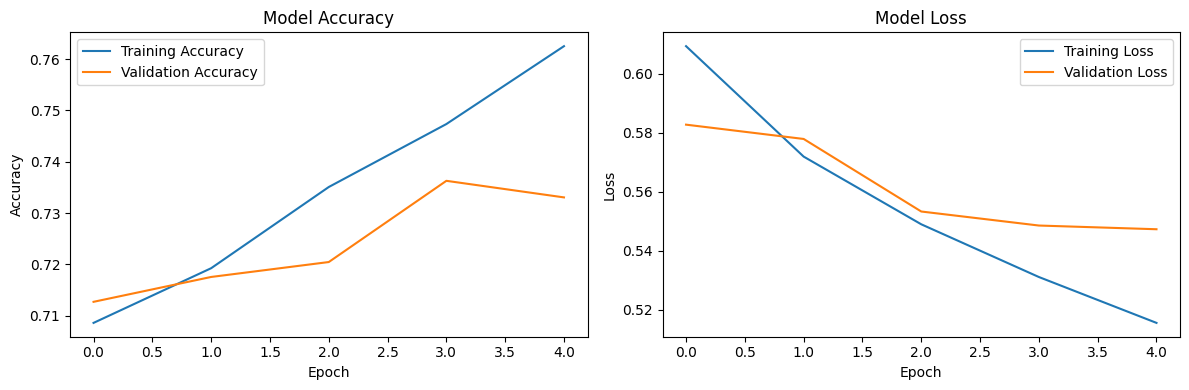

In [38]:


import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [39]:
model.save('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/CNN_BiLSTM_Hi_1.keras', save_format='tf')
model1.save('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/CNN_BiLSTM_Hi_2.keras', save_format='tf')
model2.save('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/CNN_BiLSTM_Hi_3.keras', save_format='tf')

In [40]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score


f1 = f1_score(y_val_labels, y_pred_labels, average='weighted')
precision = precision_score(y_val_labels, y_pred_labels, average='weighted')
recall = recall_score(y_val_labels, y_pred_labels, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)

F1 Score: 0.7142829238249384
Precision: 0.7114896627505604
Recall: 0.7330535829567463
{'Hate': {'precision': 0.7749003984063745, 'recall': 0.8812868146805618, 'f1-score': 0.8246767012931948, 'support': 2207.0}, 'Not Hate': {'precision': 0.5544217687074829, 'recall': 0.3658810325476992, 'f1-score': 0.44083840432724813, 'support': 891.0}, 'accuracy': 0.7330535829567463, 'macro avg': {'precision': 0.6646610835569287, 'recall': 0.6235839236141305, 'f1-score': 0.6327575528102215, 'support': 3098.0}, 'weighted avg': {'precision': 0.7114896627505604, 'recall': 0.7330535829567463, 'f1-score': 0.7142829238249384, 'support': 3098.0}}


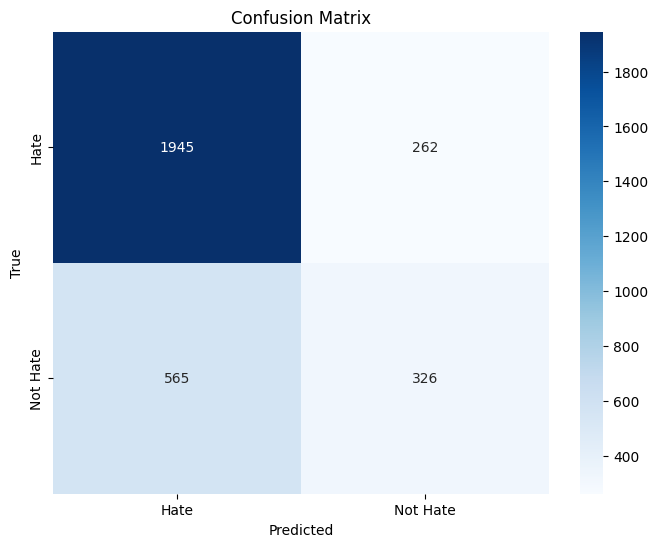

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_val_labels, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate','Not Hate'],
            yticklabels=['Hate','Not Hate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Testing on Unseen Data

In [47]:


vv_1= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/hindi/test_hi_l1.csv')
vv_2= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/hindi/test_hi_l2.csv')
vv_3= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/hindi/test_hi_l3.csv')
vv_1


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_1,NaN,0.0,NaN,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_1,0.0,NaN,NaN,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_1,0.0,NaN,0.0,0.0,NaN


In [48]:


vv1=vv_1
vv2=vv_2
vv3=vv_3

In [45]:
model1 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/CNN_BiLSTM_Hi_1.keras')
model2 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/CNN_BiLSTM_Hi_2.keras')
model3 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/CNN_BiLSTM_Hi_3.keras')


In [49]:

import nltk
import string
import re


def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text


vv_1['text'] = vv_1['text'].apply(lambda x: normalize_text(x))
vv_2['text'] = vv_2['text'].apply(lambda x: normalize_text(x))
vv_3['text'] = vv_3['text'].apply(lambda x: normalize_text(x))

vv_1 = vv_1[['text']]
vv_2 = vv_2[['text']]
vv_3 = vv_3[['text']]
vv_1.columns = ['text']
vv_2.columns = ['text']
vv_3.columns = ['text']
vv_1

,text
0,bandrastation sharadpawar muradabad अगर अभ...
1,conspiracyagainstindia सुन लो रे देश के गद्द...
2,marathareservation महाराष्ट्र में जश्न का म...
3,rheachakraborty aap mahesh bhatt se madad kiy...
4,secularmaskofd हमे पता नहि क्या कहते है इतना...
...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...
1513,जय हिन्द जय भारत वन्दे मातरम बघेल तुझसे देश शर...
1514,जय भीम जो लोग हमें धमकियां देते है और संविध...
1515,इंसान के पास दिमाग होना चाहिये खोपड़ी तो ...


In [50]:


sequence1 = tokenizer1.texts_to_sequences(vv_1.text)
sequence1 = pad_sequences(sequence1, padding='post', maxlen=max_len)

sequence2 = tokenizer2.texts_to_sequences(vv_2.text)
sequence2 = pad_sequences(sequence2, padding='post', maxlen=max_len)

sequence3 = tokenizer3.texts_to_sequences(vv_3.text)
sequence3 = pad_sequences(sequence3, padding='post', maxlen=max_len)

In [51]:


sequence1 = tokenizer1.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence1 = pad_sequences(sequence1, padding='post', maxlen = max_len)

sequence2 = tokenizer2.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence2 = pad_sequences(sequence2, padding='post', maxlen = max_len)

sequence3 = tokenizer3.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence3 = pad_sequences(sequence3, padding='post', maxlen = max_len)



In [52]:
predictions1 = model1.predict(sequence1)
classes1 = np.argmax(predictions1, axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step


In [53]:
predictions2 = model2.predict(sequence2)
classes2 = np.argmax(predictions2, axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step


In [54]:
predictions3 = model3.predict(sequence3)
classes3 = np.argmax(predictions3, axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step


In [55]:

predictions1 = np.argmax(predictions1, axis=1)
predictions2 = np.argmax(predictions2, axis=1)
predictions3 = np.argmax(predictions3, axis=1)


print(predictions1)

[0 1 0 ... 1 0 0]


In [56]:


col_lst = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']
for col in col_lst:
    vv1[col] = pd.to_numeric(vv1[col], errors='coerce')
    vv2[col] = pd.to_numeric(vv2[col], errors='coerce')
    vv3[col] = pd.to_numeric(vv3[col], errors='coerce')


vv1['label'] = vv1[col_lst].max(axis=1, skipna=True)

vv1['label'] = vv1['label'].fillna(0).astype(int)

vv2['label'] = vv2[col_lst].max(axis=1, skipna=True)

vv2['label'] = vv2['label'].fillna(0).astype(int)

vv3['label'] = vv3[col_lst].max(axis=1, skipna=True)

vv3['label'] = vv3['label'].fillna(0).astype(int)

vv1['label'] = vv1['label'].astype(int)
vv2['label'] = vv2['label'].astype(int)
vv3['label'] = vv3['label'].astype(int)

vv1 = vv1[['label', 'text']]
vv2 = vv2[['label', 'text']]
vv3 = vv3[['label', 'text']]
vv1

true_1 = vv1["label"]
true_2 = vv2["label"]
true_3 = vv3["label"]
# print(true_)
y_test_1 = true_1.values
y_test_2 = true_2.values
y_test_3 = true_3.values
print(y_test_1)
print(len(y_test_1))

[0 0 0 ... 0 0 1]
1517


In [57]:
ids = np.arange(1, len(y_test_1)+1)
result_df_1 = pd.DataFrame({'id': ids, 'prediction': predictions1, 'true': y_test_1})
# result_df_1

ids = np.arange(1, len(y_test_2)+1)
result_df_2 = pd.DataFrame({'id': ids, 'prediction': predictions2, 'true': y_test_2})
# result_df_2

ids = np.arange(1, len(y_test_3)+1)
result_df_3 = pd.DataFrame({'id': ids, 'prediction': predictions3, 'true': y_test_3})
result_df_3

,id,prediction,true
0,1,0,1
1,2,1,1
2,3,0,0
3,4,0,1
4,5,0,1
...,...,...,...
1512,1513,0,1
1513,1514,0,1
1514,1515,0,1
1515,1516,0,1


In [58]:
def compute_metrics(result_df, color):
    # Compute metrics
    accuracy = accuracy_score(result_df['true'], result_df['prediction'])
    f1 = f1_score(result_df['true'], result_df['prediction'], average='weighted')  # Use 'macro', 'micro', or 'weighted' as needed
    recall = recall_score(result_df['true'], result_df['prediction'], average='weighted')
    precision = precision_score(result_df['true'], result_df['prediction'], average='weighted')
    conf_matrix = confusion_matrix(result_df['true'], result_df['prediction'])

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    # print("Confusion Matrix:")
    # print(conf_matrix)

    conf_matrix = confusion_matrix(result_df['true'], result_df['prediction'])

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=color, xticklabels=set(result_df['true']), yticklabels=set(result_df['true']))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Accuracy: 0.6473
F1 Score: 0.6004
Recall: 0.6473
Precision: 0.7058


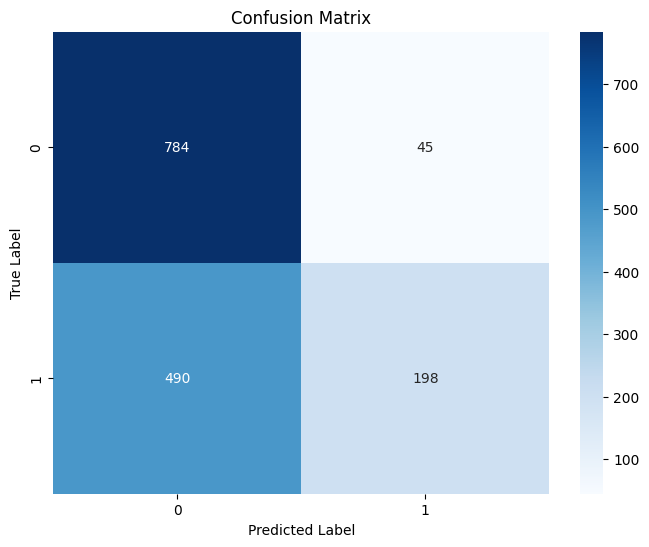

In [59]:
compute_metrics(result_df_1, "Blues")

Accuracy: 0.3296
F1 Score: 0.2892
Recall: 0.3296
Precision: 0.7943


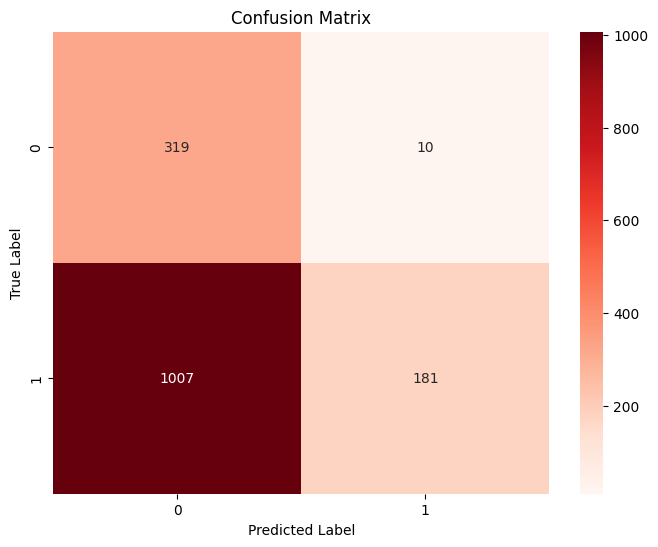

In [60]:
compute_metrics(result_df_2, "Reds")

Accuracy: 0.4799
F1 Score: 0.4374
Recall: 0.4799
Precision: 0.7642


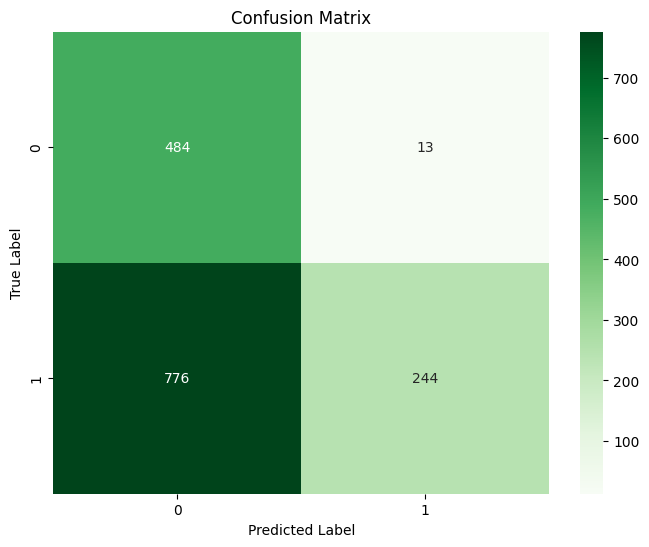

In [61]:
compute_metrics(result_df_3, "Greens")

In [62]:
result_df_1.to_csv('/content/drive/MyDrive/NLP_Project/NLP/Hindi_output/CNNBiLSTM_output_Hindi_l1.csv', index=False)
result_df_2.to_csv('/content/drive/MyDrive/NLP_Project/NLP/Hindi_output/CNNBiLSTM_output_Hindi_l2.csv', index=False)
result_df_3.to_csv('/content/drive/MyDrive/NLP_Project/NLP/Hindi_output/CNNBiLSTM_output_Hindi_l3.csv', index=False)